In [1]:
print("hello world")

hello world



https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/agents.html

In [3]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient


# 1. Assistant Agent

In [13]:
# Define a tool that searches the web for information.
# For simplicity, we will use a mock function here that returns a static string.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4.1-nano",
    # api_key="YOUR_API_KEY",
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)


In [14]:
# Use asyncio.run(agent.run(...)) when running in a script.
result = await agent.run(task="Find information on AutoGen")
print(result.messages)


[TextMessage(source='user', models_usage=None, metadata={}, content='Find information on AutoGen', type='TextMessage'), ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=15), metadata={}, content=[FunctionCall(id='call_79Ob6NDq6MDBFjAEks5wmsKl', arguments='{"query":"AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_79Ob6NDq6MDBFjAEks5wmsKl', is_error=False)], type='ToolCallExecutionEvent'), ToolCallSummaryMessage(source='assistant', models_usage=None, metadata={}, content='AutoGen is a programming framework for building multi-agent applications.', type='ToolCallSummaryMessage')]


# Multi-Modal Input


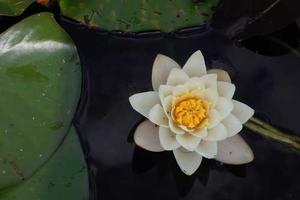

In [15]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [16]:
# Use asyncio.run(...) when running in a script.
result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore


The image features a white water lily flower in bloom, with a bright yellow center, floating on the water's surface. The flower is surrounded by green lily pads.


In [12]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.run_stream(task="Find information on AutoGen"):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.run_stream(task="Find information on AutoGen"),
        output_stats=True,  # Enable stats printing.
    )
# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4.1-nano",
    # api_key="YOUR_API_KEY",
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    #tools=[assistant_run_stream],
    system_message="Use tools to solve tasks.",
)

# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream() 
# Use asyncio.run(agent.run(...)) when running in a script.
# = await agent.run(task="Find information on AutoGen")
#print(result.messages)  # Print the final message from the agent.



---------- TextMessage (user) ----------


Find information on AutoGen
---------- TextMessage (assistant) ----------
AutoGen is an open-source framework designed to facilitate the development of AI-powered applications, particularly those involving complex conversation flows and automated interactions. It provides tools to create, manage, and deploy AI agents that can collaborate, reason, and perform tasks autonomously.

Key features of AutoGen include:
- Support for multiple AI models and APIs
- Facilitation of multi-agent systems with autonomous reasoning
- Built-in prompts and conversation management tools
- Integration capabilities with various platforms and programming languages

AutoGen is popular among developers building AI assistants, chatbots, and automated workflows that require sophisticated multi-agent coordination.

For the latest details, documentation, and community resources, visit the [AutoGen GitHub repository](https://github.com/Significant-Gravitas/Auto-GPT) or their official project page.
[Prompt tokens: 2